<center><h1>Cai_Tufei_HW5</h1></center>
<br>
<br>

Name: Tufei Cai
<br>
Github Username: tufeitsai
<br>
USC ID: 1947878719

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# from skmultilearn.problem_transform import LabelPowerset
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import _tree
from sklearn.impute import SimpleImputer
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import xgboost as xgb

### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
# According to the data description
'''
-- Attribute lines:
For example, '35,9 no no yes yes yes yes no'
Where:
'35,9' Temperature of patient
'no' Occurrence of nausea
'no' Lumbar pain
'yes' Urine pushing (continuous need for urination)
'yes' Micturition pains
'yes' Burning of urethra, itch, swelling of urethra outlet
'yes' decision: Inflammation of urinary bladder
'no' decision: Nephritis of renal pelvis origin 
'''

tree_data_path = '../data/diagnosis.data'
tree_df = pd.read_csv(tree_data_path, delimiter='\t', encoding='utf-16', header = None)
tree_columns = ['Temperature','Nausea', 'Lumbar pain','Urine Pushing','Micturition Pains','Urethra Pain','Inflammation of Urinary Bladder','Nephritis of Renal Pelvis Origin']
tree_df.columns = tree_columns
tree_df.head() # cleaned data

,Temperature,Nausea,Lumbar pain,Urine Pushing,Micturition Pains,Urethra Pain,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


### (b) Build a decision tree

In [3]:
# As mentioned in Piazza, do three decision trees, one on Urinary Bladder, One on Nephritis, and one on both
# The decision tree need to convert the temp as number, but with comma it couldn't covert to float
tree_df['Temperature'] = tree_df['Temperature'].str.replace(',', '.')

# Decision Tree Encoding
label_encoder = LabelEncoder()
tree_df['Nausea'] = label_encoder.fit_transform(tree_df['Nausea'])
tree_df['Lumbar pain'] = label_encoder.fit_transform(tree_df['Lumbar pain'])
tree_df['Urine Pushing'] = label_encoder.fit_transform(tree_df['Urine Pushing'])
tree_df['Micturition Pains'] = label_encoder.fit_transform(tree_df['Micturition Pains'])
tree_df['Urethra Pain'] = label_encoder.fit_transform(tree_df['Urethra Pain'])
tree_df['Inflammation of Urinary Bladder'] = label_encoder.fit_transform(tree_df['Inflammation of Urinary Bladder'])
tree_df['Nephritis of Renal Pelvis Origin'] = label_encoder.fit_transform(tree_df['Nephritis of Renal Pelvis Origin'])
tree_df.head()

,Temperature,Nausea,Lumbar pain,Urine Pushing,Micturition Pains,Urethra Pain,Inflammation of Urinary Bladder,Nephritis of Renal Pelvis Origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


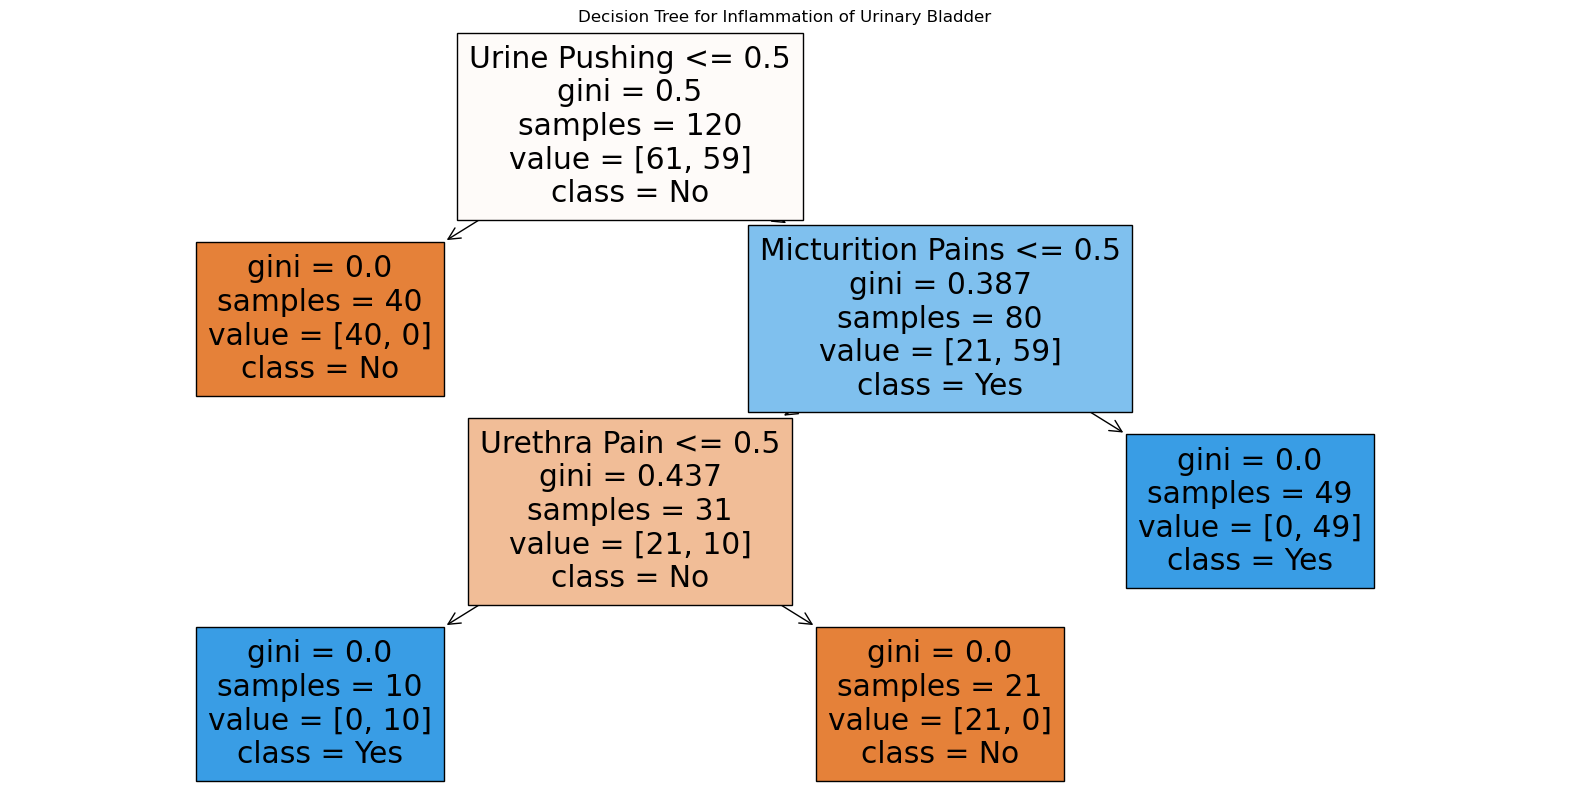

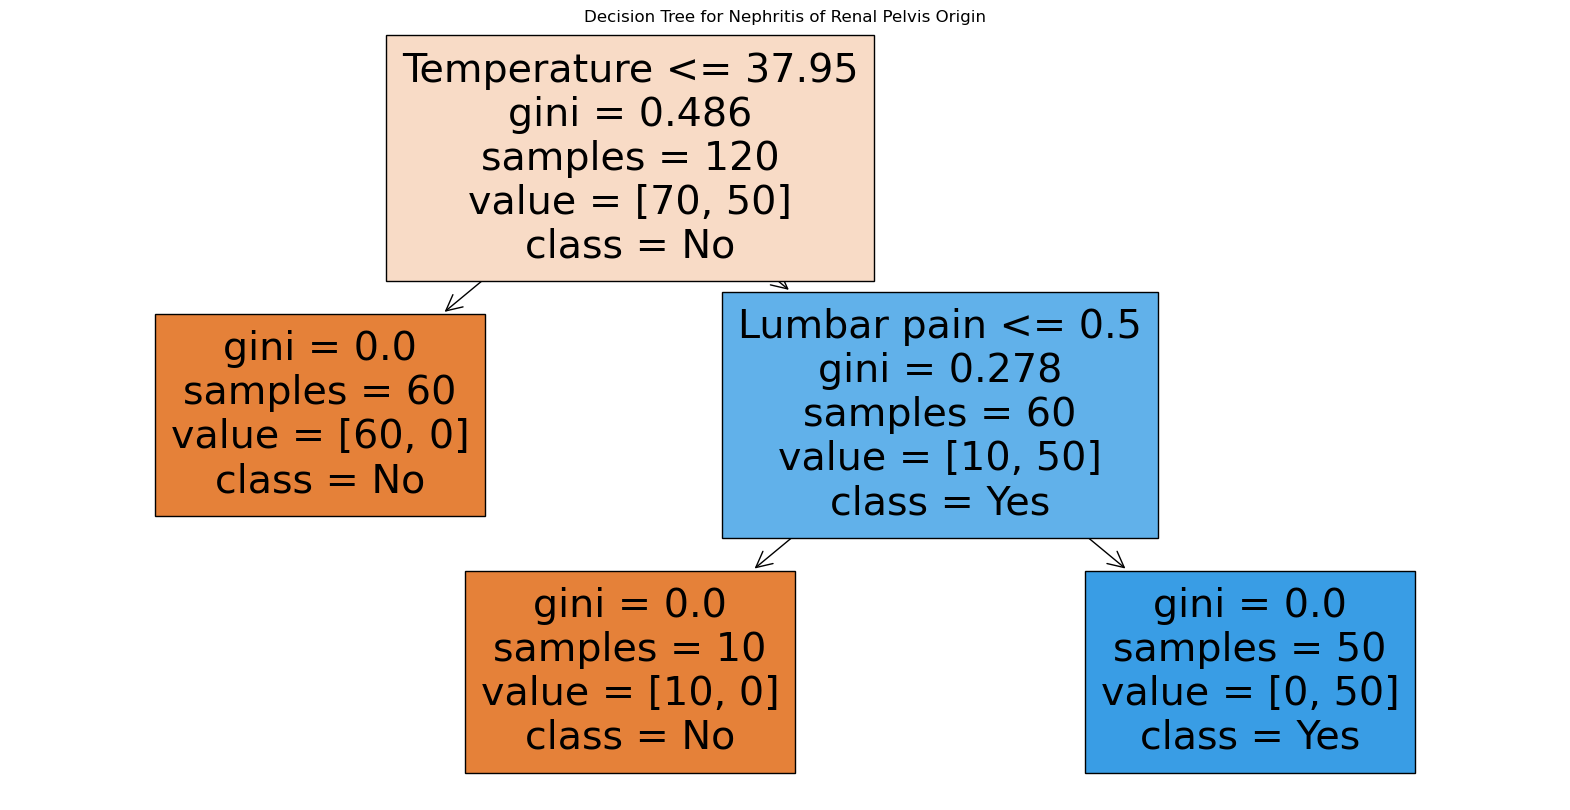

In [4]:
# Build a decision tree on the whole dataset
X_urinary_bladder = tree_df.drop(columns=['Inflammation of Urinary Bladder'])
y_urinary_bladder = tree_df['Inflammation of Urinary Bladder']

#  Inflammation of Urinary Bladder
clf_urinary_bladder = DecisionTreeClassifier()
clf_urinary_bladder.fit(X_urinary_bladder, y_urinary_bladder)

plt.figure(figsize=(20,10))
plot_tree(clf_urinary_bladder, feature_names=list(X_urinary_bladder.columns), class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Inflammation of Urinary Bladder")
plt.show()

# Nephritis of Renal Pelvis Origin
X_nephritis = tree_df.drop(columns=['Nephritis of Renal Pelvis Origin'])
y_nephritis = tree_df['Nephritis of Renal Pelvis Origin']

clf_nephritis = DecisionTreeClassifier()
clf_nephritis.fit(X_nephritis, y_nephritis)

plt.figure(figsize=(20,10))
plot_tree(clf_nephritis, feature_names=list(X_nephritis.columns), class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Nephritis of Renal Pelvis Origin")
plt.show()

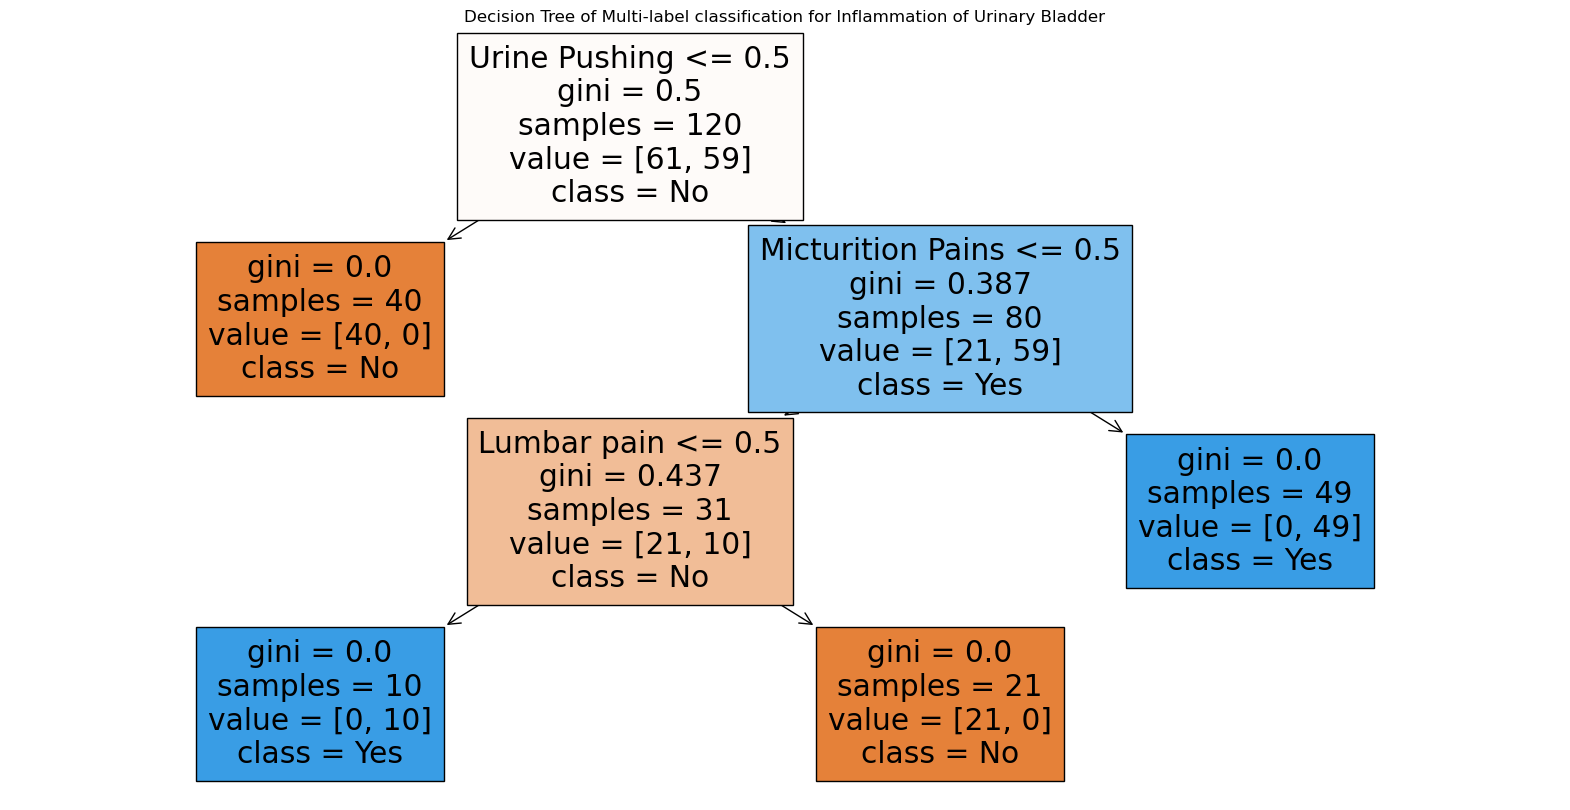

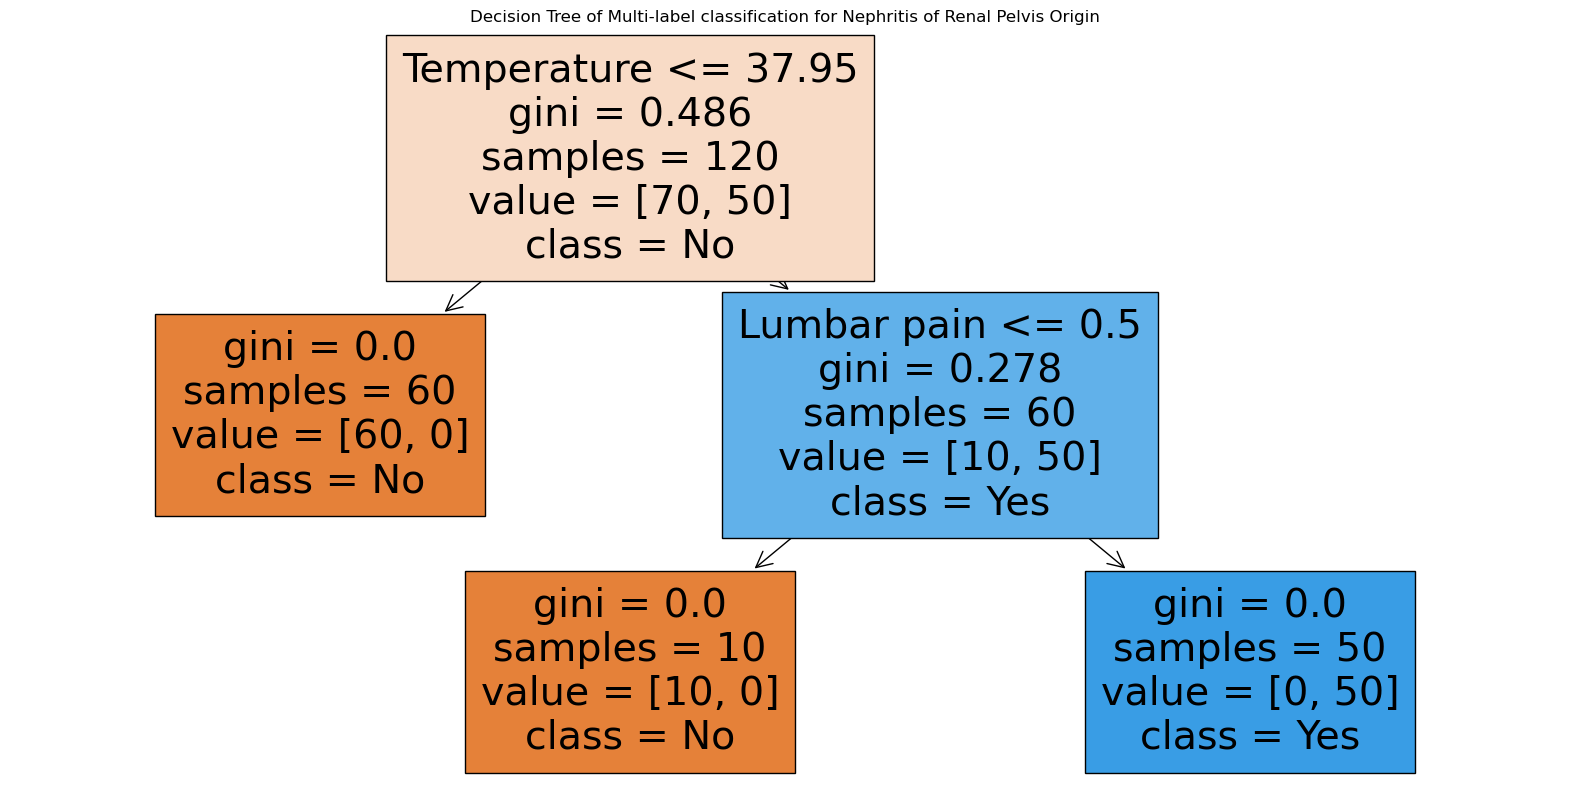

In [5]:
# Both (Multiclass)
X = tree_df.drop(columns=["Inflammation of Urinary Bladder", "Nephritis of Renal Pelvis Origin"])
y = tree_df[["Inflammation of Urinary Bladder", "Nephritis of Renal Pelvis Origin"]]

clf = DecisionTreeClassifier()
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_classifier.fit(X, y)

# plot of decision tree for inflammation
plt.figure(figsize=(20, 10))
plot_tree(multi_target_classifier.estimators_[0], feature_names=list(X.columns), class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree of Multi-label classification for Inflammation of Urinary Bladder")
plt.show()

# plot of decision tree for nephritis
plt.figure(figsize=(20, 10))
plot_tree(multi_target_classifier.estimators_[1], feature_names=list(X.columns), class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree of Multi-label classification for Nephritis of Renal Pelvis Origin")
plt.show()

### (c) Convert the decision rules

In [6]:
# URL:https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)


# Urinary Bladder Only
print('IF-THEN rules for Inflammations Decision Tree')
tree_to_code(clf_urinary_bladder, list(X_urinary_bladder.columns))
print('')

# Nephritis Only
print('IF-THEN rules for Nephritis Decision Tree')
tree_to_code(clf_nephritis, list(X_nephritis.columns))
print('')

# Urinary Bladder with multi-label classification tree
print('IF-THEN rules for Inflammations with multi-label Decision Tree')
tree_to_code(multi_target_classifier.estimators_[0], list(X.columns))
print('')

# Nephritis with multi-label classification tree
print('IF-THEN rules for Nephritis with multi-label Decision Tree')
tree_to_code(multi_target_classifier.estimators_[1], list(X.columns))

IF-THEN rules for Inflammations Decision Tree
def tree(Temperature, Nausea, Lumbar pain, Urine Pushing, Micturition Pains, Urethra Pain, Nephritis of Renal Pelvis Origin):
  if Urine Pushing <= 0.5:
    return [[40.  0.]]
  else:  # if Urine Pushing > 0.5
    if Micturition Pains <= 0.5:
      if Urethra Pain <= 0.5:
        return [[ 0. 10.]]
      else:  # if Urethra Pain > 0.5
        return [[21.  0.]]
    else:  # if Micturition Pains > 0.5
      return [[ 0. 49.]]

IF-THEN rules for Nephritis Decision Tree
def tree(Temperature, Nausea, Lumbar pain, Urine Pushing, Micturition Pains, Urethra Pain, Inflammation of Urinary Bladder):
  if Temperature <= 37.95000076293945:
    return [[60.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]]
    else:  # if Lumbar pain > 0.5
      return [[ 0. 50.]]

IF-THEN rules for Inflammations with multi-label Decision Tree
def tree(Temperature, Nausea, Lumbar pain, Urine Pushing, Micturition Pain

### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision  rules with high interpretability.

#### Decision Tree for Inflammation of Urinary Bladder

Best alpha: 0.001
Used Features: Index(['Urine Pushing', 'Micturition Pains', 'Urethra Pain'], dtype='object')


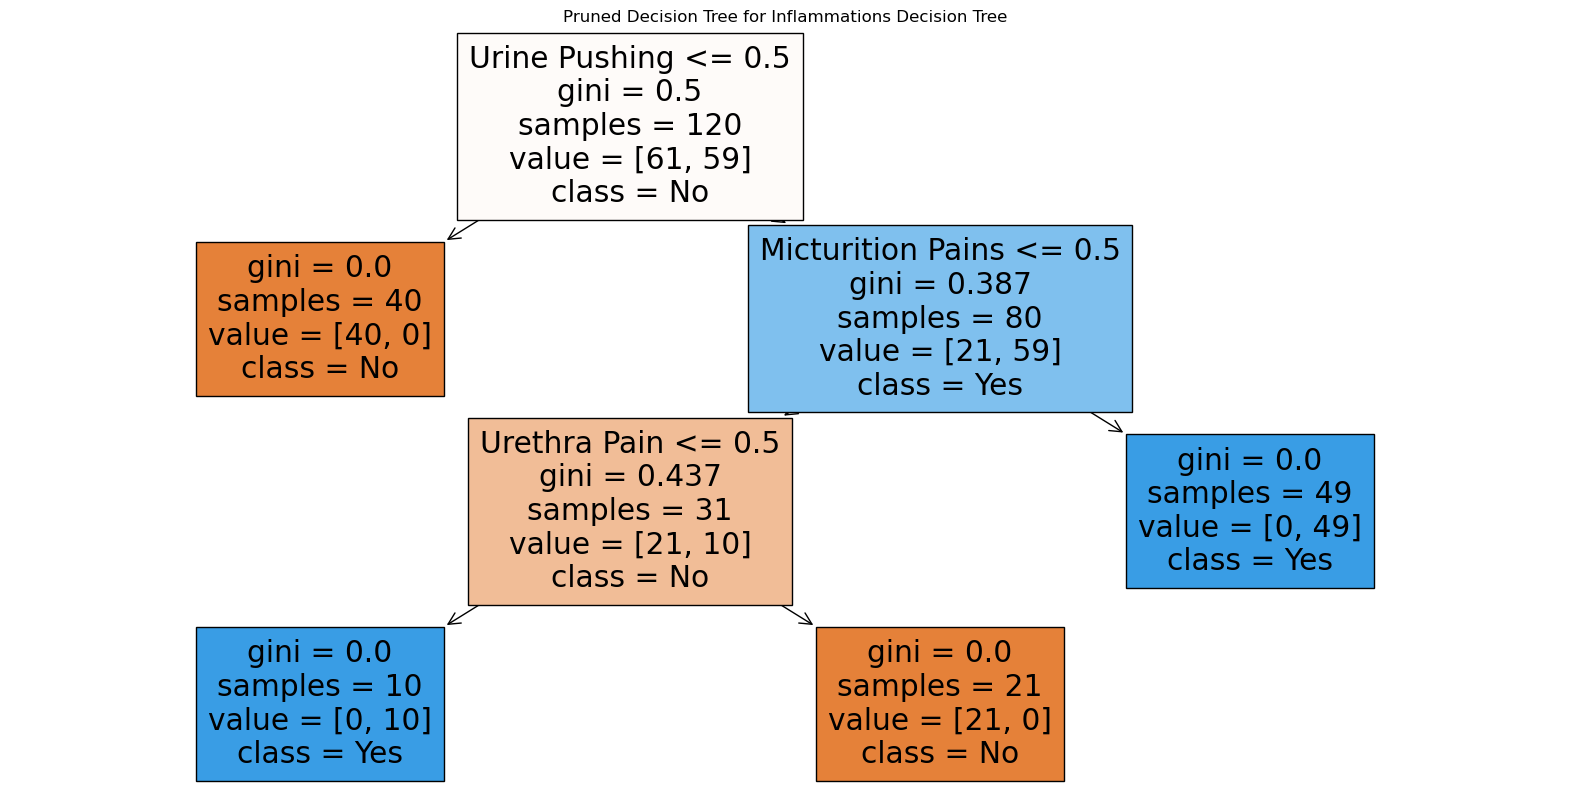

In [7]:
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]
param_grid = {'ccp_alpha': alpha_values}

# Inflammation Tree
Urinary_clf = DecisionTreeClassifier()
Urinary_grid_search = GridSearchCV(Urinary_clf, param_grid, cv=5)

Urinary_grid_search.fit(X_urinary_bladder, y_urinary_bladder)
Urinary_best_alpha = Urinary_grid_search.best_params_['ccp_alpha']
print("Best alpha:", Urinary_best_alpha)


Urinary_clf_pruned_best = DecisionTreeClassifier(ccp_alpha=Urinary_best_alpha)
Urinary_clf_pruned_best.fit(X_urinary_bladder, y_urinary_bladder)

Urinary_importances_best = Urinary_clf_pruned_best.feature_importances_
Urinary_used_feature_indices = np.where(Urinary_importances_best > 0)
Urinary_used_features = X_urinary_bladder.columns[Urinary_used_feature_indices]
print('Used Features:', Urinary_used_features)

# Plot
plt.figure(figsize=(20, 10))
plot_tree(Urinary_clf_pruned_best, feature_names=list(X_urinary_bladder.columns), class_names=["No", "Yes"], filled=True)
plt.title("Pruned Decision Tree for Inflammations Decision Tree")
plt.show()

#### Decision Tree for Nephritis of Renal Pelvis Origin

Best alpha: 0.001
Used Features: Index(['Temperature', 'Lumbar pain'], dtype='object')


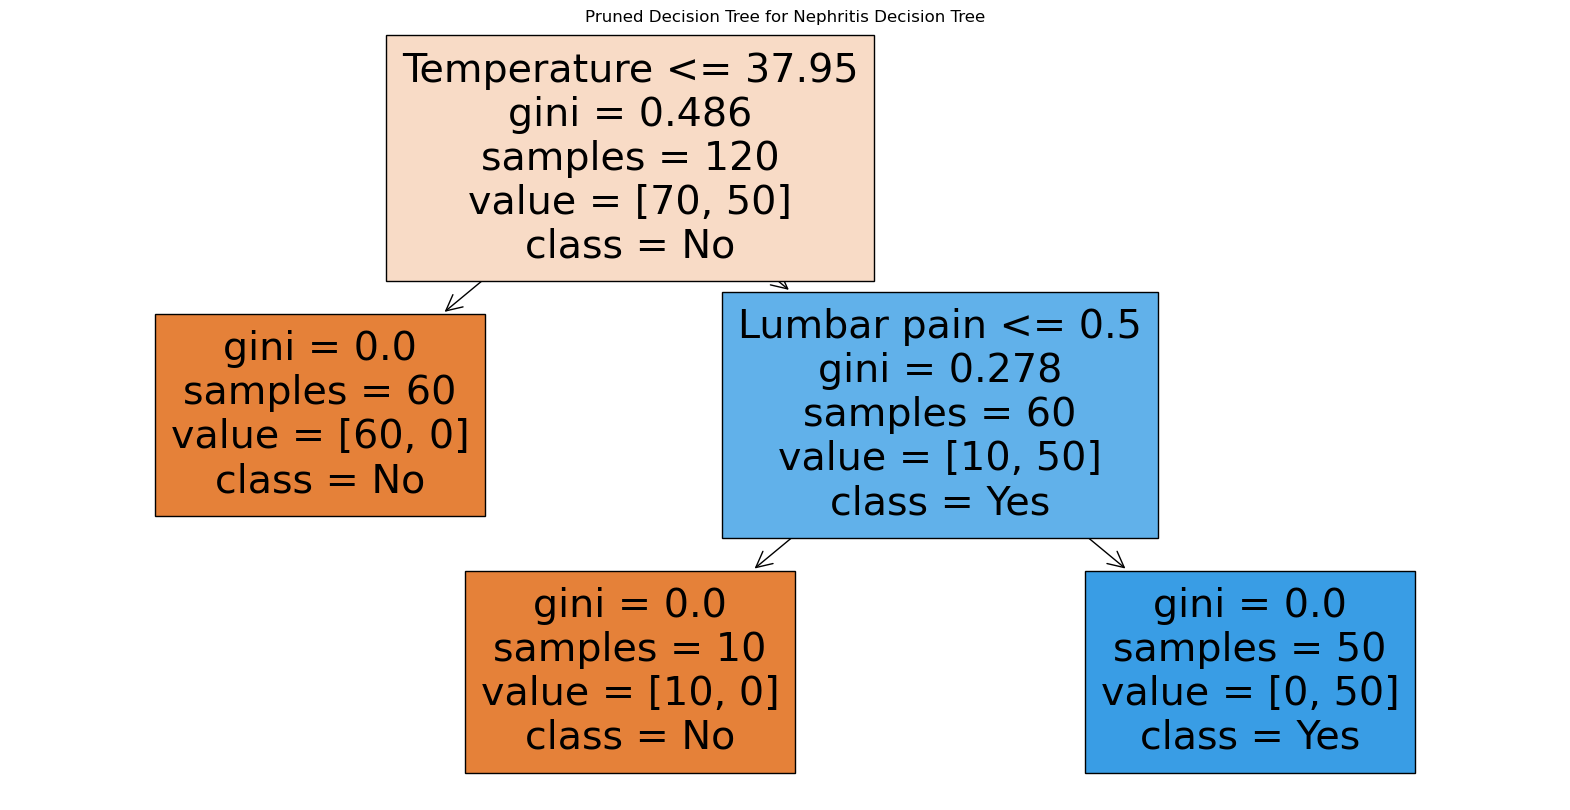

In [8]:
# Nephritis Tree
Nephritis_clf = DecisionTreeClassifier()
Nephritis_grid_search = GridSearchCV(Nephritis_clf, param_grid, cv=5)

Nephritis_grid_search.fit(X_nephritis, y_nephritis)
Nephritis_best_alpha = Nephritis_grid_search.best_params_['ccp_alpha']
print("Best alpha:", Nephritis_best_alpha)


Nephritis_clf_pruned_best = DecisionTreeClassifier(ccp_alpha=Nephritis_best_alpha)
Nephritis_clf_pruned_best.fit(X_nephritis, y_nephritis)

Nephritis_importances_best = Nephritis_clf_pruned_best.feature_importances_
Nephritis_used_feature_indices = np.where(Nephritis_importances_best > 0)
Nephritis_used_features = X_urinary_bladder.columns[Nephritis_used_feature_indices]
print('Used Features:', Nephritis_used_features)

# Plot
plt.figure(figsize=(20, 10))
plot_tree(Nephritis_clf_pruned_best, feature_names=list(X_nephritis.columns), class_names=["No", "Yes"], filled=True)
plt.title("Pruned Decision Tree for Nephritis Decision Tree")
plt.show()

#### Decision Tree For Multi-Label Classification

Best alpha: 0.001
Used Features after pruning with best alpha: Index(['Temperature', 'Nausea', 'Lumbar pain', 'Urine Pushing'], dtype='object')


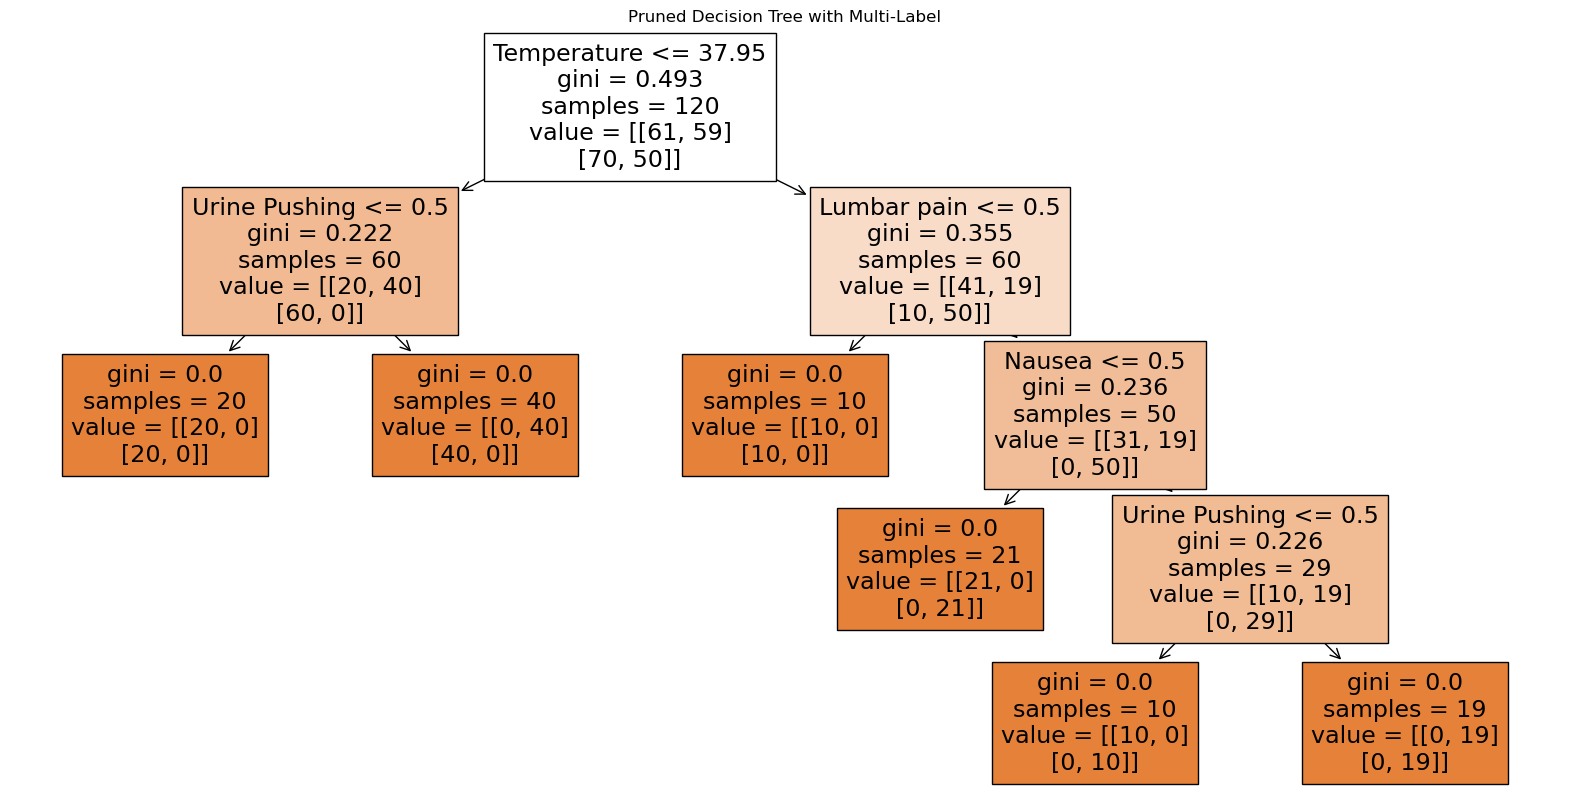

In [9]:
mlt_clf = DecisionTreeClassifier()
mlt_grid_search = GridSearchCV(mlt_clf, param_grid, cv=5)
mlt_grid_search.fit(X, y)

mlt_best_alpha = mlt_grid_search.best_params_['ccp_alpha']
print("Best alpha:", mlt_best_alpha)

mlt_clf_pruned_best = DecisionTreeClassifier(ccp_alpha=mlt_best_alpha)
mlt_clf_pruned_best.fit(X, y)

# Used features
mult_importances_best = mlt_clf_pruned_best.feature_importances_
mult_used_feature_indices = np.where(mult_importances_best > 0)[0]
mult_used_features = X.columns[mult_used_feature_indices]
print('Used Features after pruning with best alpha:', mult_used_features)

# plot
class_names = ["No Inflammation", "Yes Inflammation", "No Nephritis", "Yes Nephritis"]
plt.figure(figsize=(20, 10))
plot_tree(mlt_clf_pruned_best, feature_names=list(X.columns), class_names=class_names, filled=True)
plt.title("Pruned Decision Tree with Multi-Label")
plt.show()

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [10]:
crime_data_path = '../data/communities.data'
crime_df = pd.read_csv(crime_data_path, header=None, na_values='?', delimiter = ',')

def variable_names(file_path):
    variable_names = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[210 - 1:341]  # Adjust for 0-based indexing
        for line in lines:
            if '-- ' in line:
                variable_name = line.split('-- ')[1].split(':')[0].strip()
                variable_names.append(variable_name)
    return variable_names

variable_names = variable_names('../data/communities.names')
print(variable_names)

# ViolentCrimePerPop is the goal to predict
# 5 non-predictive: state, county, community, communityname, fold
crime_df.columns = variable_names
non_predictive_features = ['state', 'county', 'community', 'communityname', 'fold']
crime_df.drop(columns = non_predictive_features, inplace=True)

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [11]:
# Use the first 1495 rows of data as the training set and the rest as the test set
train_data = crime_df.iloc[:1495]
test_data = crime_df.iloc[1495:]
crime_df.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [12]:
train_data.shape

(1495, 123)

### (b) Missing values

In [13]:
non_predictive_features = ['state', 'county', 'community', 'communityname', 'fold']
predictive_features = [col for col in train_data.columns if col not in non_predictive_features]

imputer = SimpleImputer(strategy='mean')
imputer.fit(train_data)

train_data = train_data.copy()
test_data = test_data.copy()

train_data.loc[:, predictive_features] = imputer.transform(train_data)
test_data.loc[:, predictive_features] = imputer.transform(test_data)

In [14]:
train_data.isna().sum()

population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 123, dtype: int64

In [15]:
test_data.isna().sum()

population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 123, dtype: int64

### (c) Plot a correlation matrix

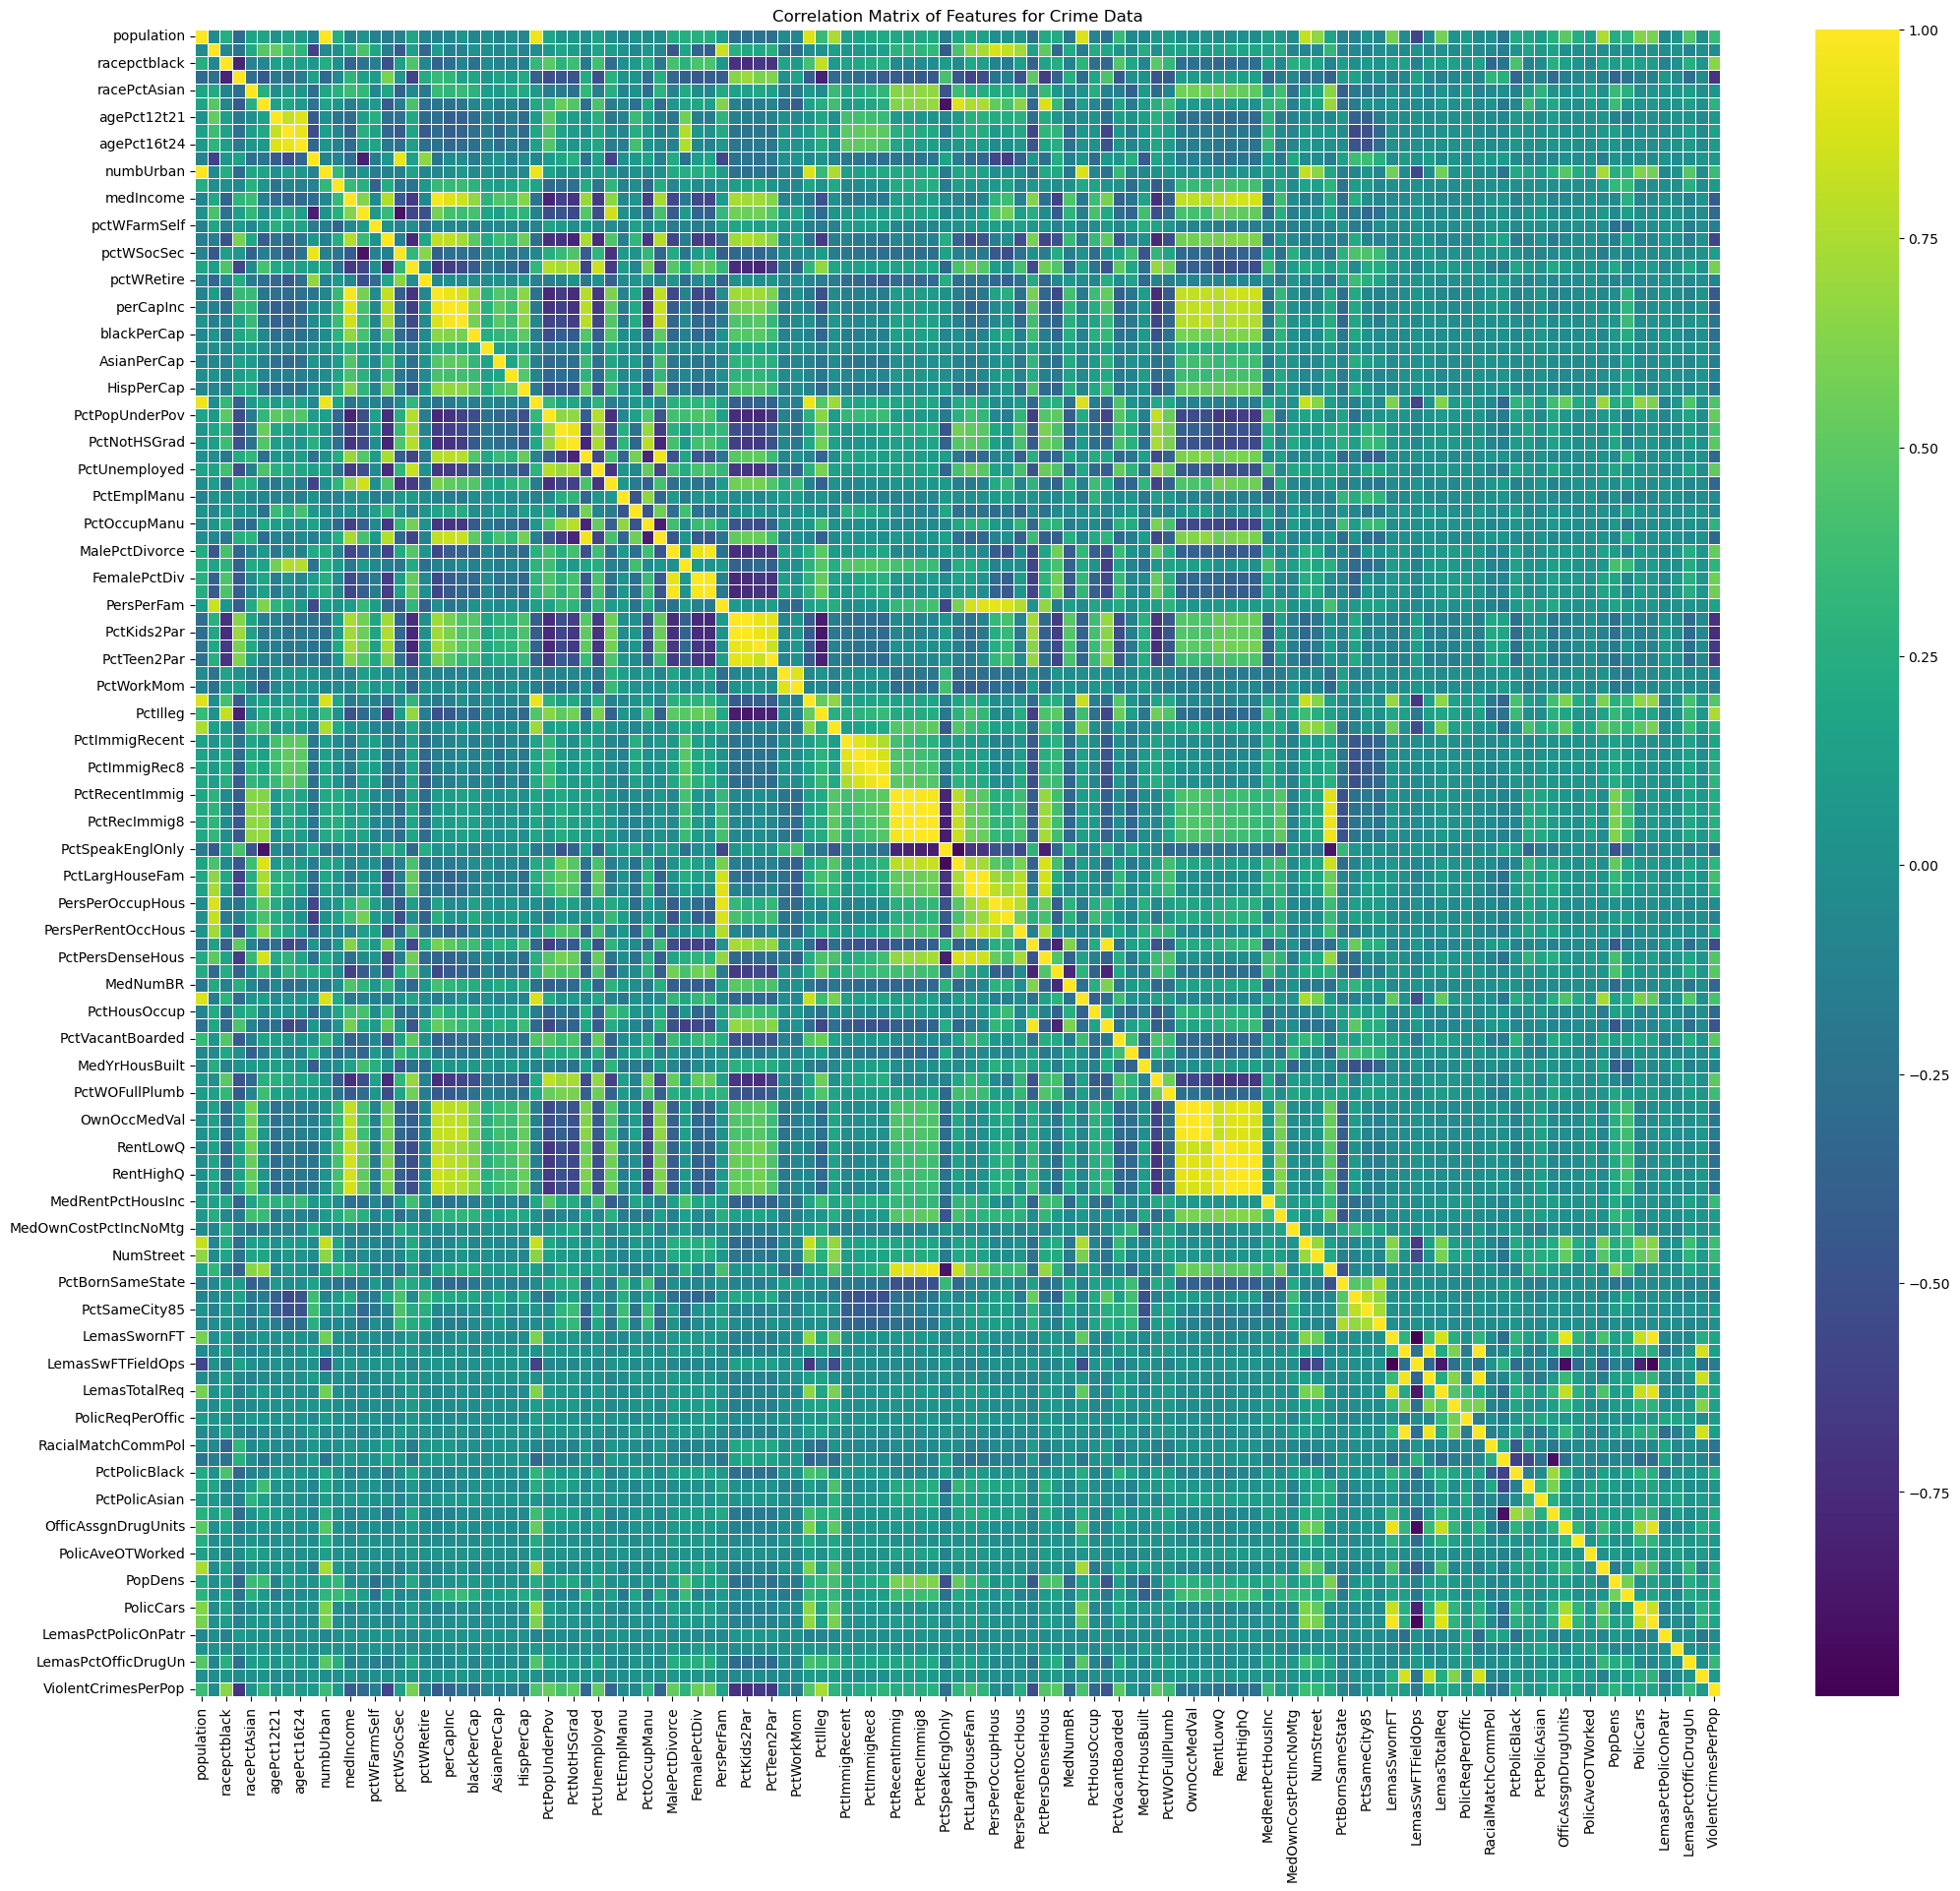

In [16]:
corr_matrix = train_data.corr()
plt.figure(figsize=(25, 22))

sns.heatmap(corr_matrix, cmap='viridis', annot=False, linewidths=0.5)
plt.title('Correlation Matrix of Features for Crime Data')
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [17]:
mean = train_data.mean()
sd = train_data.std()
Coefficient_Variation = sd / mean
Coefficient_Variation_df = Coefficient_Variation.to_frame()

print('The Coefficient of Variation for each feature:')
Coefficient_Variation

The Coefficient of Variation for each feature:


population             2.241105
householdsize          0.355800
racepctblack           1.428885
racePctWhite           0.330213
racePctAsian           1.359100
                         ...   
LemasPctPolicOnPatr    0.115739
LemasGangUnitDeploy    0.362989
LemasPctOfficDrugUn    2.552946
PolicBudgPerPop        0.326026
ViolentCrimesPerPop    0.987909
Length: 123, dtype: float64

### (e) Scatter plots and box plots for highest CV features

In [18]:
i = math.floor(np.sqrt(128))
top_features = Coefficient_Variation.sort_values(ascending = False).head(i)
top_features

NumStreet              4.292923
NumInShelters          3.470952
NumIlleg               3.058964
NumImmig               2.926635
LemasPctOfficDrugUn    2.552946
NumUnderPov            2.342443
population             2.241105
numbUrban              2.038461
HousVacant             1.968467
LandArea               1.645408
racePctHisp            1.612091
dtype: float64

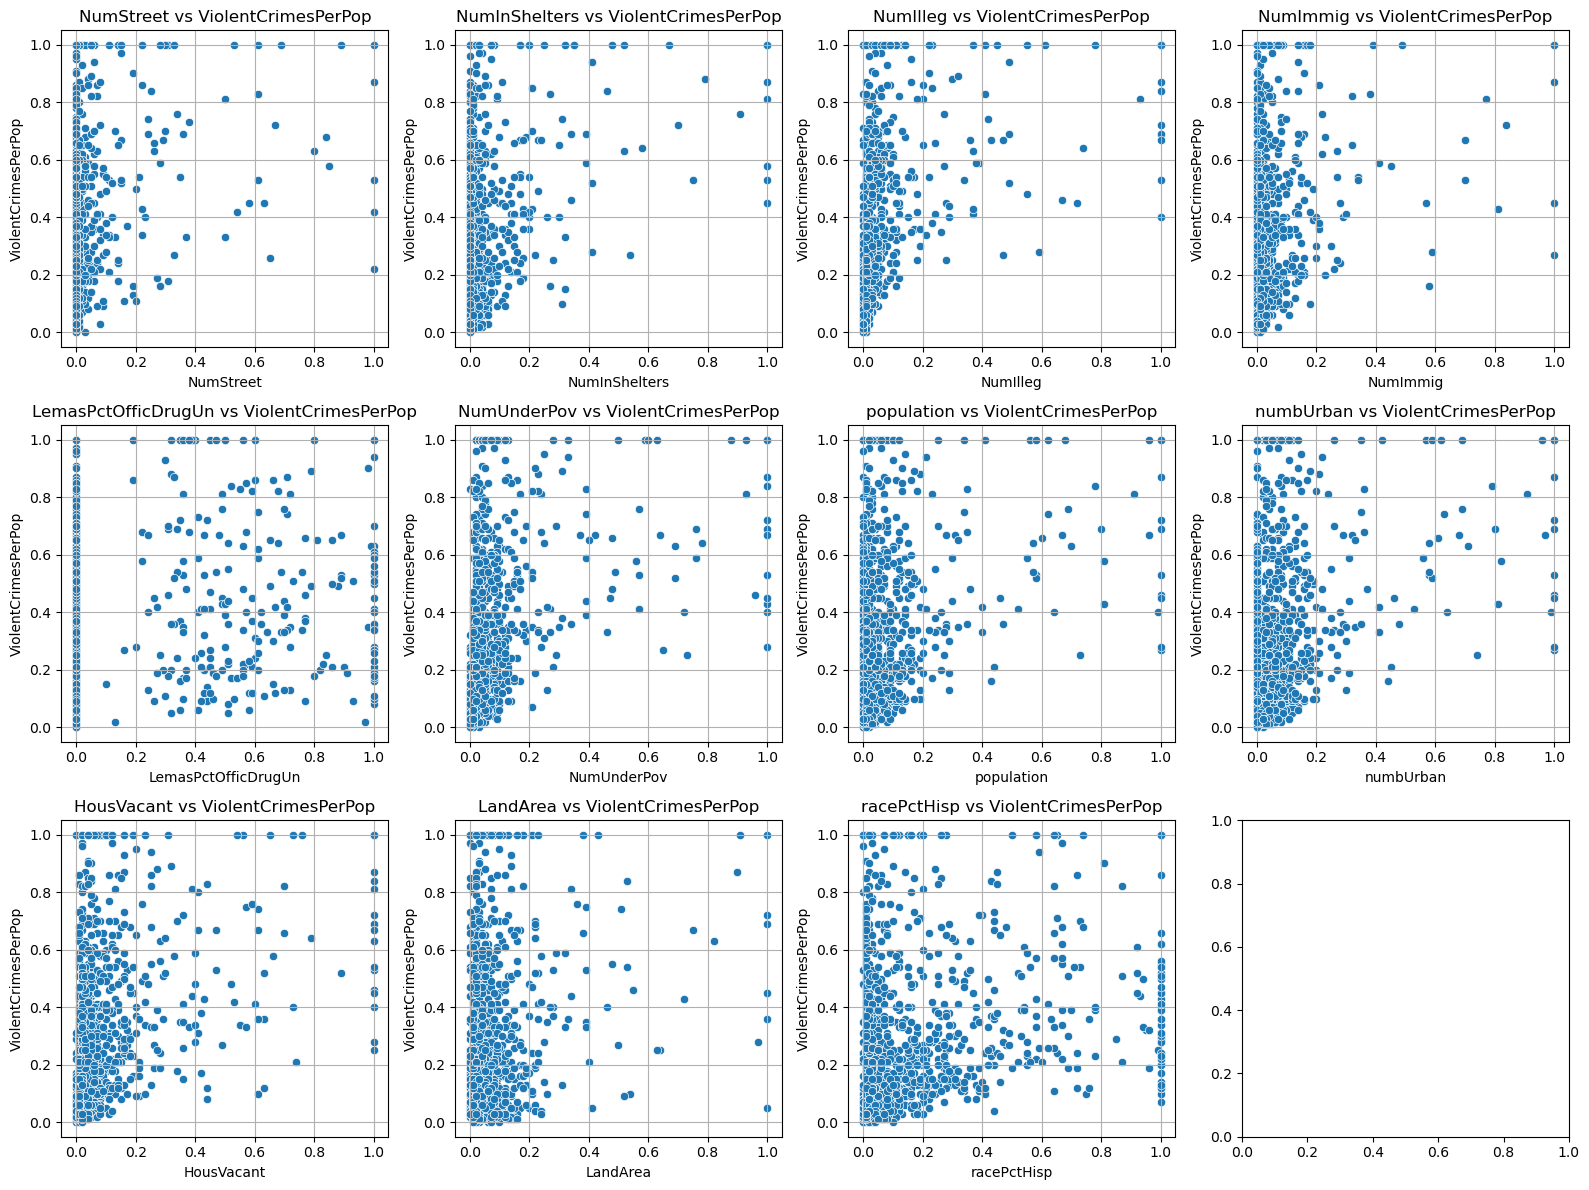

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(top_features.index):
    sns.scatterplot(x=train_data[feature], y=train_data['ViolentCrimesPerPop'], ax=axes[i])
    axes[i].set_title(f"{feature} vs ViolentCrimesPerPop")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("ViolentCrimesPerPop")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### (f) Fit a linear model

In [20]:
# train and test
X_train = train_data.drop(columns=['ViolentCrimesPerPop'])
y_train = train_data['ViolentCrimesPerPop']
X_test = test_data.drop(columns=['ViolentCrimesPerPop'])
y_test = test_data['ViolentCrimesPerPop']

In [21]:
# Using OLS linear regression
X_train = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()
X_test = sm.add_constant(X_test)
y_pred = ols_results.predict(X_test)

# MSE
OLS_test_error = mean_squared_error(y_test, y_pred)
print("Test Error:", OLS_test_error)

Test Error: 0.018141971135530153


### (g) Fit a ridge regression model

In [22]:
# Ridge regression with CV on lamda
# CV
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], cv=5)
ridge_cv.fit(X_train, y_train)

# Ridge with best lamda
ridge_lamda = ridge_cv.alpha_
print('The best lamda is:',ridge_lamda)
ridge_model = Ridge(alpha=ridge_lamda)
ridge_model.fit(X_train, y_train)
ridge_test_preds = ridge_model.predict(X_test)

# MSE
ridge_test_error = mean_squared_error(y_test, ridge_test_preds)
print("Ridge Regression Model Test Error:", ridge_test_error)

The best lamda is: 1.0
Ridge Regression Model Test Error: 0.01773247499289664


### (h) Fit a LASSO model

In [23]:
# LASSO  without Standardization
# CV
lasso_cv = LassoCV(cv=5, random_state=42, max_iter = 10000)
lasso_cv.fit(X_train, y_train)
lasso_lamda = lasso_cv.alpha_
print('The best lamda is:', lasso_lamda)

# Fit with best lamda
lasso_model = Lasso(alpha=lasso_lamda)
lasso_model.fit(X_train, y_train)
lasso_test_preds = lasso_model.predict(X_test)

# MSE
lasso_test_error = mean_squared_error(y_test, lasso_test_preds)
lasso_selected_variables = X_train.columns[lasso_model.coef_ != 0]
print("Selected Variables(without standardization):", lasso_selected_variables)
print("Test Error(without standardization):", lasso_test_error)

The best lamda is: 0.00011614723626829846
Selected Variables(without standardization): Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'RentLowQ', 'MedRent', 'MedRentPc

In [24]:
# LASSO model with Standardization
# standardize
# btw the data is assuming normalized
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# CV
lasso_cv_std = LassoCV(cv=5, random_state=42, max_iter = 10000)
lasso_cv_std.fit(X_train_std, y_train)
lasso_lamda_std = lasso_cv_std.alpha_
print('The best lamda is:', lasso_lamda_std)
# LASSO with best lamda
lasso_model_std = Lasso(alpha=lasso_lamda_std)
lasso_model_std.fit(X_train_std, y_train)
lasso_test_preds_std = lasso_model_std.predict(X_test_std)

# MSE
lasso_test_error_std = mean_squared_error(y_test, lasso_test_preds_std)
lasso_selected_variables_std = X_train.columns[lasso_model_std.coef_ != 0]
print("Selected Variables(Standardized):", lasso_selected_variables_std)
print("Test Error(Standardized):", lasso_test_error_std)

The best lamda is: 0.0007630833878262516
Selected Variables(Standardized): Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent',
       'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCost

### (i) Fit a PCR model

In [25]:
# PCR
# First apply PCA
# Then apply linear regression
# M (the number of principal components) chosen by cross-validation

# Using Pipeline
pipeline = Pipeline([('pca', PCA()),('regression', LinearRegression())])

m = range(1,123) # 1 - 122, only 122 features and 1 prdicted value
result = {'pca__n_components': m}
grid_search = GridSearchCV(estimator=pipeline, param_grid=result, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

best_m = grid_search.best_params_['pca__n_components']
print("Best number of components:", best_m)

Best number of components: 96


In [26]:
# Use the optimal M (96) to fit a linear regression
pca = PCA(n_components=best_m)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit linear regression 
pcr = LinearRegression()
pcr.fit(X_train_pca, y_train)
pcr_y_pred = pcr.predict(X_test_pca)

# MSE
pcr_test_error = mean_squared_error(y_test, pcr_y_pred)
print("Test error:", pcr_test_error)

Test error: 0.01847179803662373


### (j) Fit a boosting tree

#### XGBoost with L1 Regularization 

In [27]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# reg_alpha for L1
# CV to find best alpha
alpha_param_grid = {
    'reg_alpha': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]  # Regularization term values to try
}

l1_grid_search = GridSearchCV(estimator=xgb_model, param_grid=alpha_param_grid, cv=5)
l1_grid_search.fit(X_train, y_train)

best_reg_alpha = l1_grid_search.best_params_['reg_alpha']
print('The best alpha:',best_reg_alpha)

# XGB regression model with L1
l1_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=best_reg_alpha)
l1_xgb_model.fit(X_train, y_train)
l1_y_pred = l1_xgb_model.predict(X_test)

# MSE
l1_xgb_test_error = mean_squared_error(y_test, l1_y_pred)
print("Mean Squared Error With L1 Regularization", l1_xgb_test_error)

The best alpha: 1.0
Mean Squared Error With L1 Regularization 0.017317034514479836


In [28]:
# L2 regularization
# reg_lambda for L2
lambda_param_grid = {
    'reg_lambda': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]
}

l2_grid_search = GridSearchCV(estimator=xgb_model, param_grid=lambda_param_grid, cv=5)
l2_grid_search.fit(X_train, y_train)
best_reg_lambda = l2_grid_search.best_params_['reg_lambda']
print('The best lambda:', best_reg_lambda)

# L2 XGBoost regression
l2_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=best_reg_lambda)
l2_xgb_model.fit(X_train, y_train)
l2_y_pred = l2_xgb_model.predict(X_test)

l2_xgb_test_error = mean_squared_error(y_test, l2_y_pred)
print("Mean Squared Error With L2 Regularization:", l2_xgb_test_error)

The best lambda: 1000
Mean Squared Error With L2 Regularization: 0.01695441300715322


#### MSE for All models:

In [29]:
# linear_test_error, OLS, ridge, lasso, lasso_test_error_std, pcr_test_error, xgb_test_error(l1, l2)
model_name = [ 'OLS Linear Regression', 'Ridge Regression', 'LASSO', 'LASSO with Standardized Features', 'PCR', 'XGBoost with L1-penalized regression','XGBoost with L2-penalized regression']
all_mse = [OLS_test_error.round(5), ridge_test_error.round(5), lasso_test_error, lasso_test_error_std, pcr_test_error, l1_xgb_test_error,l2_xgb_test_error]

mse_df = pd.DataFrame({'Model':model_name, 'MSE':all_mse})
mse_df['MSE'] = mse_df['MSE'].round(5)
mse_df

,Model,MSE
0,OLS Linear Regression,0.01814
1,Ridge Regression,0.01773
2,LASSO,0.01776
3,LASSO with Standardized Features,0.01781
4,PCR,0.01847
5,XGBoost with L1-penalized regression,0.01732
6,XGBoost with L2-penalized regression,0.01695
